## DataSet

In [1]:
import pandas as pd
dataset=pd.read_csv('dataset-acquisto.csv')

In [2]:
print(dataset.shape)

(5000, 6)


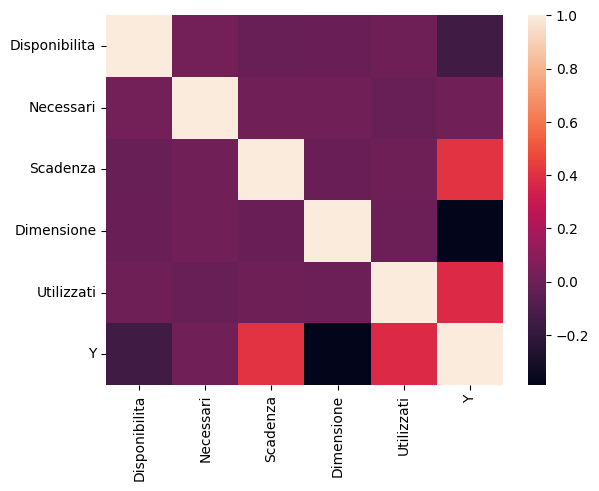

In [3]:
import seaborn as sns
sns.heatmap(dataset.corr());

In [4]:
X= dataset.drop(['Y',"Necessari"], axis=1)
y=dataset["Y"].to_frame().values.reshape(-1,1)

print(X.shape)
print(y.shape)

(5000, 4)
(5000, 1)


In [5]:
X.head()

,Disponibilita,Scadenza,Dimensione,Utilizzati
0,1146,11,100,765
1,174,2,1000,668
2,2487,7,1000,750
3,709,18,500,408
4,3671,13,100,931


In [6]:
y[:5]

array([[72],
       [ 1],
       [ 2],
       [13],
       [78]], dtype=int64)

<AxesSubplot: >

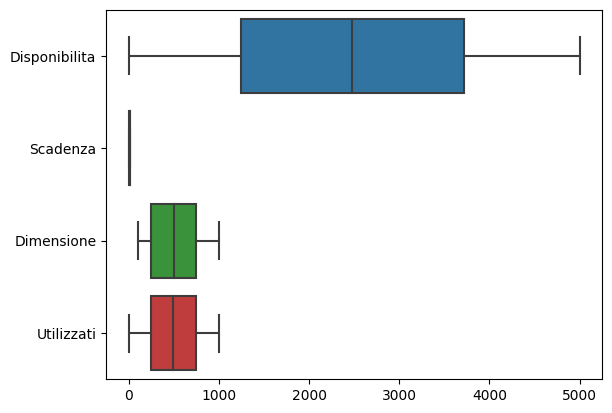

In [7]:
sns.boxplot(data=X, orient='h')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print("Train Shape:", X_train.shape," - ",y_train.shape)
print("Test Shape: ",X_test.shape," - ",y_test.shape)

Train Shape: (3500, 4)  -  (3500, 1)
Test Shape:  (1500, 4)  -  (1500, 1)


## Valutazione

In [9]:
from sklearn.metrics import mean_absolute_error

def evaluate(model, X_train, y_train, X_test, y_test):  
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, Y_pred_train)
    mae_test = mean_absolute_error(y_test, Y_pred_test)  

    print("Train set:  MAE="+str(mae_train))
    print("Test set:  MAE="+str(mae_test))

## Standardizzazione

In [10]:
#Standardizzare
from sklearn.preprocessing import MinMaxScaler

mms_input=MinMaxScaler()

X_train=mms_input.fit_transform(X_train)
X_test=mms_input.transform(X_test)

mms_output=MinMaxScaler()

y_train=mms_output.fit_transform(y_train)
y_test=mms_output.transform(y_test)

<AxesSubplot: >

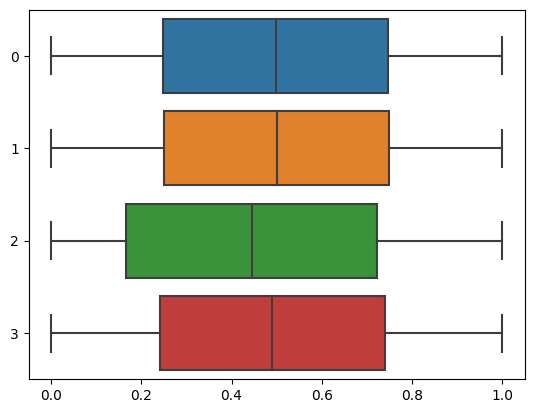

In [11]:
sns.boxplot(data=X_train, orient='h')

## Train

### Regression Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
rt=DecisionTreeRegressor(criterion="friedman_mse",min_samples_split=3,max_features=5)
rt.fit(X_train,y_train)

evaluate(rt,X_train,y_train,X_test,y_test)

Train set:  MAE=0.0009367681498829043
Test set:  MAE=0.01071766848816029


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion="friedman_mse",n_estimators=100)
rf.fit(X_train,y_train.reshape(-1))

evaluate(rf,X_train,y_train,X_test,y_test)

Train set:  MAE=0.002385386416861828
Test set:  MAE=0.00644841530054645


### SGD Regression

In [26]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X_train,y_train.reshape(-1))

evaluate(sgd,X_train,y_train,X_test,y_test)

Train set:  MAE=0.054339605866878596
Test set:  MAE=0.05536456639645765


### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

evaluate(lr,X_train,y_train,X_test,y_test)

Train set:  MAE=0.056247411830363456
Test set:  MAE=0.0572424456978445


## Prediction

In [17]:
def prediction(model,index,verbose=True):
    prediction=mms_output.inverse_transform(
        [model.predict([X_test[index]])]
    )

    real=mms_output.inverse_transform(
        [y_test[index]]
    )
    if verbose==True:
        print("Prediction: ",prediction)
        print("Expected: ",real)
        print("Absolute Error: ",abs(real-prediction))
    
    return abs(real-prediction)

In [18]:
def absolute_error(model):
    error=0.
    for i in range(1500):
        error+=prediction(model,i,verbose=False)

    return error/1500

In [31]:
print("Absolute Error Regression Tree:",absolute_error(rt)[0][0])
print("Absolute Error Regression Forest:",absolute_error(rf)[0][0])

Absolute Error Regression Tree: 1.9613333333333334
Absolute Error Regression Forest: 1.1800599999999999


In [32]:
i=58
prediction(rt,i)
print("\n\n")
prediction(rf,i)

Prediction:  [[0.]]
Expected:  [[0.]]
Absolute Error:  [[0.]]



Prediction:  [[0.]]
Expected:  [[0.]]
Absolute Error:  [[0.]]


array([[0.]])

## Export Model

In [21]:
from joblib import dump, load
dump(rt, 'regression_tree.joblib') 
dump(mms_input,"mms_input.bin")
dump(mms_output,"mms_output.bin")

# Load Model From file
# rt = load('regression_tree.joblib')
# mms_input = load('mms_input.bin')
# mms_output = load('mms_output.bin')

# Prediction
# mms_output.inverse_transform([y_test[5]])

['mms_output.bin']